Dataset shape: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.3

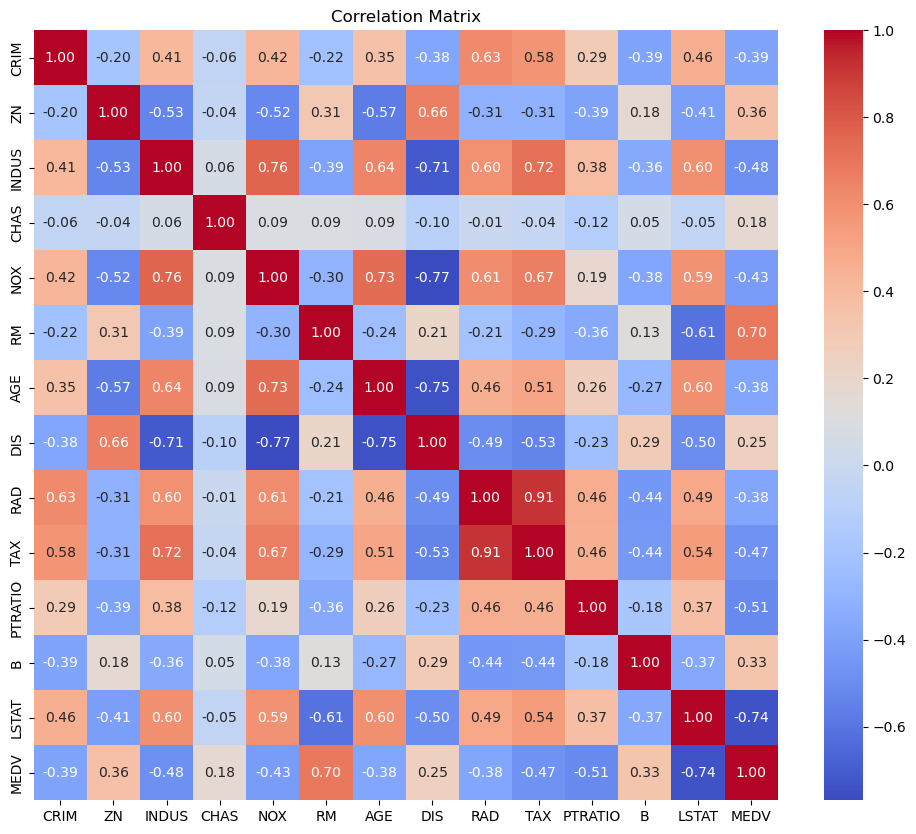

Top features correlated with MEDV:
 LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: MEDV, dtype: float64


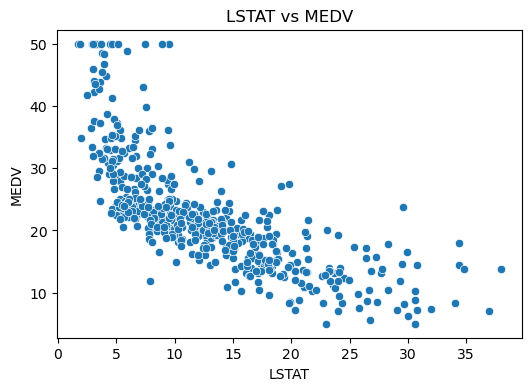

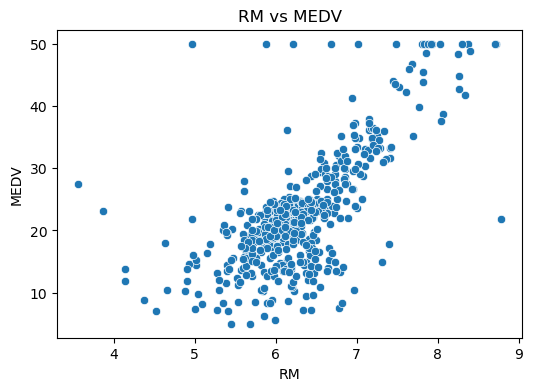

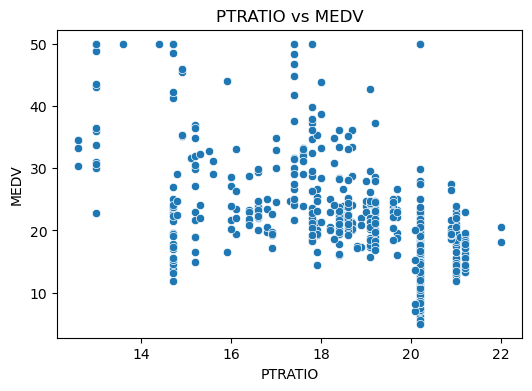

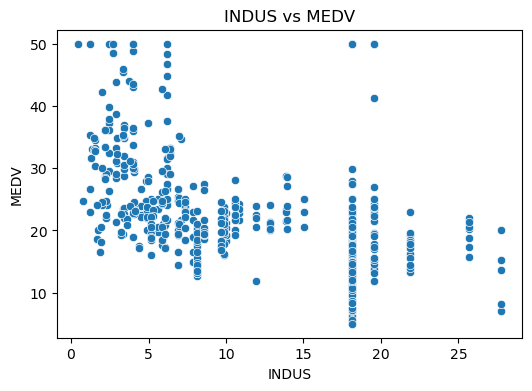

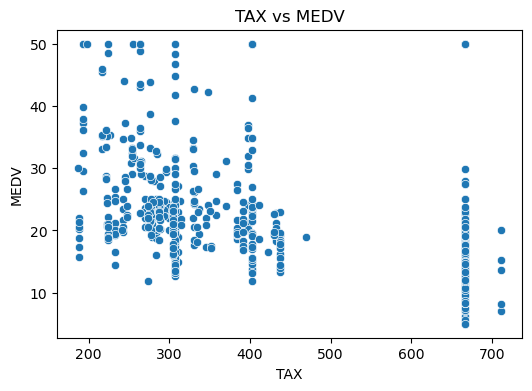

Mean Squared Error on test set: 24.291
R² Score on test set: 0.669


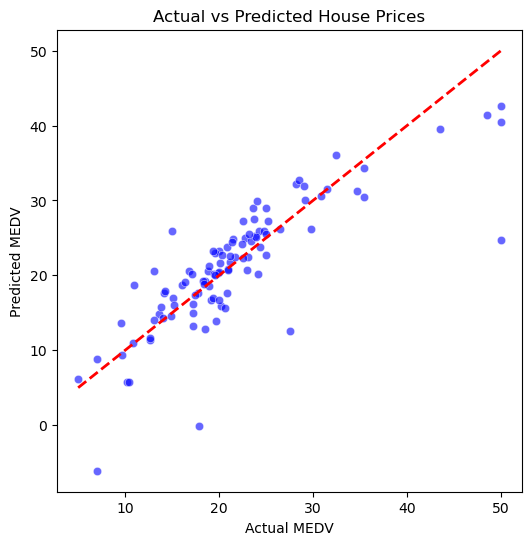

Feature coefficients (highest to lowest):
    Feature  Coefficient
5        RM     3.115718
8       RAD     2.282785
11        B     1.126499
3      CHAS     0.706532
1        ZN     0.701556
2     INDUS     0.276752
6       AGE    -0.177060
0      CRIM    -0.971494
9       TAX    -1.792605
10  PTRATIO    -1.979954
4       NOX    -1.991430
7       DIS    -3.045771
12    LSTAT    -3.628149


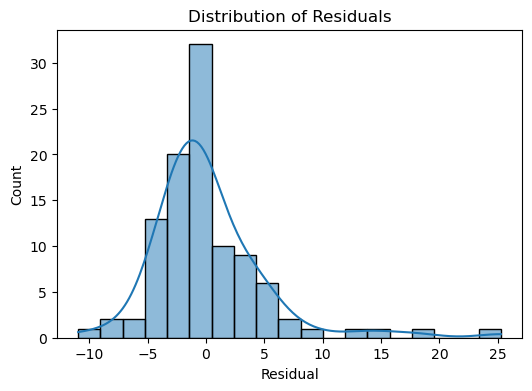

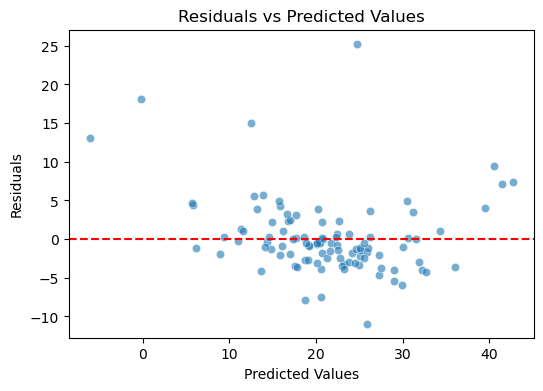

==== Summary ====
- Data points: 506
- Features: 13
- Test size: 20%
- MSE: 24.291
- R²: 0.669


In [1]:
# Boston Housing Regression Project
# -----------------------------------

# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Load Dataset

# Option A: via OpenML (if you have openml library)
try:
    from sklearn.datasets import fetch_openml
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    df = boston.frame
    # target is "MEDV"
except Exception as e:
    # Option B: direct CSV from UCI or GitHub repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
    colnames = [
        "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
        "RAD","TAX","PTRATIO","B","LSTAT","MEDV"
    ]
    df = pd.read_csv(url, header=None, delim_whitespace=True, names=colnames)

# Show first few rows
print("Dataset shape:", df.shape)
df.head()

# 3. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot of most correlated features vs target
top_corr = df.corr()["MEDV"].abs().sort_values(ascending=False)[1:6]
print("Top features correlated with MEDV:\n", top_corr)

for feature in top_corr.index:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y="MEDV")
    plt.title(f"{feature} vs MEDV")
    plt.show()

# 4. Data Preprocessing

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Feature scaling (optional but helpful)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

# 5. Train Linear Regression Model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 6. Evaluate Model

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on test set: {:.3f}".format(mse))
print("R² Score on test set: {:.3f}".format(r2))

# 7. Visualize Predictions

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.show()

# 8. Model Coefficients

coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Feature coefficients (highest to lowest):")
print(coeffs)

# 9. Optional: Residual Analysis

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# 10. Summary

print("==== Summary ====")
print(f"- Data points: {df.shape[0]}")
print(f"- Features: {df.shape[1]-1}")
print(f"- Test size: 20%")
print(f"- MSE: {mse:.3f}")
print(f"- R²: {r2:.3f}")

